## Linear Regression

In [23]:
import numpy as np
from sklearn import datasets

#np.set_printoptions(precision=2)

N = 10
X, y = datasets.make_regression(n_samples=N, n_features=1, n_targets=1, noise=20, random_state=0)
print('X=', X)
print('X.shape=', X.shape)
print('y=', y)

X= [[ 0.4 ]
 [-0.1 ]
 [ 0.41]
 [-0.98]
 [ 0.98]
 [ 0.95]
 [ 2.24]
 [-0.15]
 [ 1.87]
 [ 1.76]]
X.shape= (10, 1)
y= [ 53.3  -27.39  40.05 -49.17  87.18  67.73 189.    -6.48 144.23 190.57]


### scatter plot

Text(0,0.5,'y')

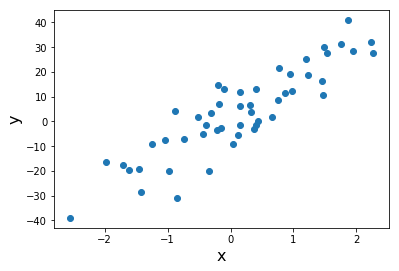

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

### construct training and test datasets

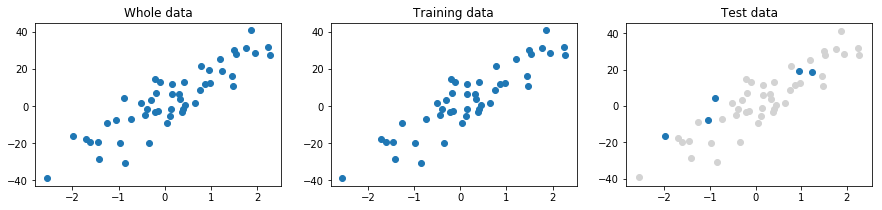

In [104]:
N = 50
X, y = datasets.make_regression(n_samples=N, n_features=1, n_targets=1, noise=10, random_state=0)


plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
plt.scatter(X, y)
plt.title('Whole data')

train_size = int(N*.9)

# construct training data // split the first slice
X_tr = X[:train_size]
y_tr = y[:train_size]

# construct testing data // using the remaining slice
X_te = X[train_size:]
y_te = y[train_size:]

plt.subplot(1, 3, 2)
plt.scatter(X_tr, y_tr)
plt.title('Training data')

plt.subplot(1, 3, 3)
plt.scatter(X_te, y_te)
plt.title('Test data')

if 1:
    plt.scatter(X_tr, y_tr, c='lightgray')

if 0:
    x_max = X.max()
    x_min = X.min()
    y_max = y.max()
    y_min = y.min()

    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])



### fit the training data to a linear model

In [114]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_tr, y_tr)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
print(model.coef_)
print(model.intercept_)

[14.66]
0.8066463683872565


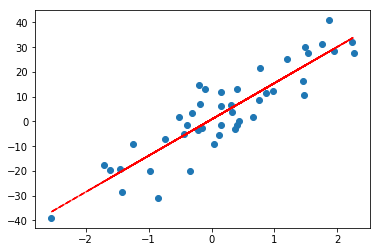

In [121]:
plt.scatter(X_tr, y_tr)

plt.plot(X, X*model.coef_ + model.intercept_, '--', c='red')


### make predictions using the above model

In [89]:
y_pred = model.predict(X_te)

print('y_pred =  ', y_pred)
print('y_acutal =', y_te)

y_pred =   [ 14.74  18.84 -12.21 -14.57 -28.24]
y_acutal = [ 19.36  18.85   4.32  -7.59 -16.23]


### plot prediction vs. actual value

Text(0.5,1,'Prediction')

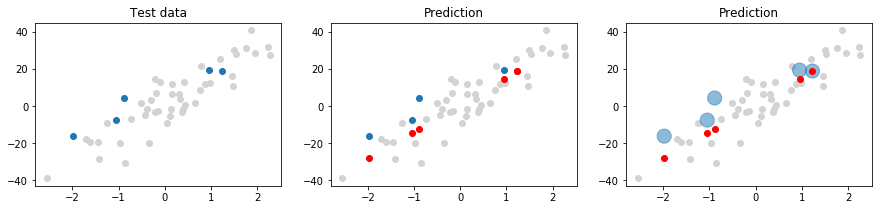

In [85]:
plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
plt.scatter(X_tr, y_tr, c='lightgray')
plt.scatter(X_te, y_te)
plt.title('Test data')


plt.subplot(1, 3, 2)
plt.scatter(X_tr, y_tr, c='lightgray')

plt.scatter(X_te, y_te)

plt.scatter(X_te, y_pred, c='red')

plt.title('Prediction')


plt.subplot(1, 3, 3)
plt.scatter(X_tr, y_tr, c='lightgray')

plt.scatter(X_te, y_te, s=[200]*len(y_te), alpha=0.5)

plt.scatter(X_te, y_pred, c='red')
# plt.scatter(X_te, y_pred, marker='.', c='red')

plt.title('Prediction')



## Classification

In [94]:
import matplotlib.pyplot as plt

loaded_data = datasets.load_iris()
X = loaded_data.data
y = loaded_data.target

print('First 10 data points of X =\n', X[:10,:])
print('y =', y)

First 10 data points of X =
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
y = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


(150, 2)

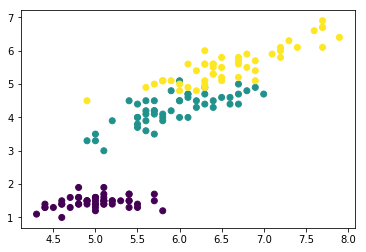

In [95]:
plt.scatter(X[:,0], X[:,2], c=y)
X = X[:, [0, 2]]
X.shape

### Gaussian Naive Bayes model

In [97]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

(135, 2)
(15, 2)
[2 1 0 2 0 2 0 2 2 1 2 1 1 1 1]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1]


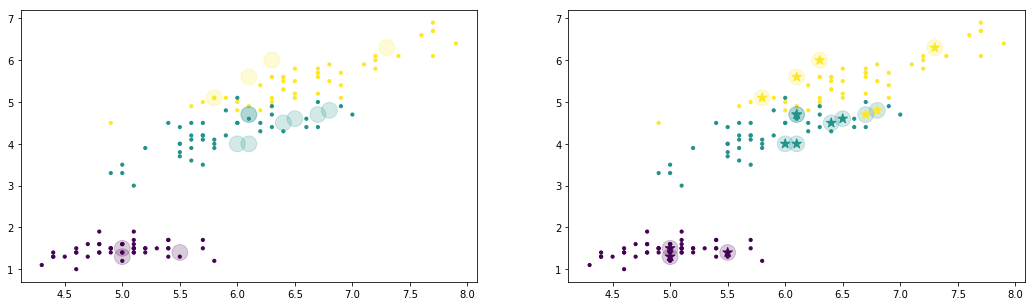

In [98]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1, random_state=0)

print(X_tr.shape)
print(X_te.shape)

model = GaussianNB()

model.fit(X_tr, y_tr)

y_pred = model.predict(X_te)

print(y_pred)
print(y_te)

plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)

plt.scatter(X_tr[:,0], X_tr[:,1], c=y_tr, s=[10]*len(y_tr))
plt.scatter(X_te[:,0], X_te[:,1], c=y_te, marker='o', s=[250]*len(y_te), alpha=0.2)

plt.subplot(1, 2, 2)
plt.scatter(X_tr[:,0], X_tr[:,1], c=y_tr, s=[10]*len(y_tr))
plt.scatter(X_te[:,0], X_te[:,1], c=y_te, marker='o', s=[250]*len(y_te), alpha=0.2)
plt.scatter(X_te[:,0], X_te[:,1], c=y_pred, marker='*',  s=[100]*len(y_te))


### Support Vector Model

In [99]:
from sklearn.svm import SVC

(135, 2)
(15, 2)
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1]


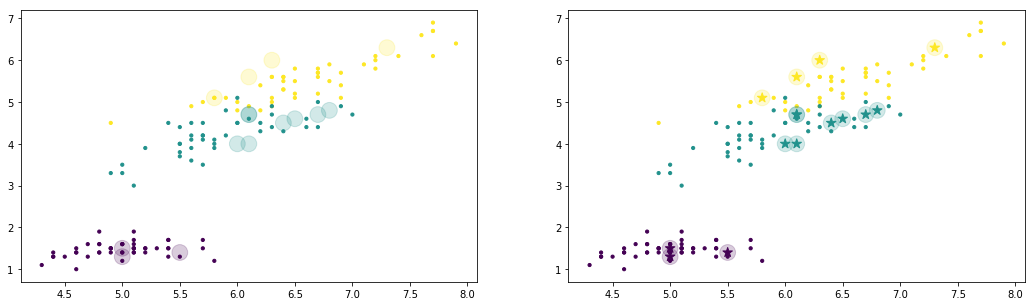

In [100]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1, random_state=0)

print(X_tr.shape)
print(X_te.shape)

model = SVC()

model.fit(X_tr, y_tr)

y_pred = model.predict(X_te)

print(y_pred)
print(y_te)

plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)

plt.scatter(X_tr[:,0], X_tr[:,1], c=y_tr, s=[10]*len(y_tr))
plt.scatter(X_te[:,0], X_te[:,1], c=y_te, marker='o', s=[250]*len(y_te), alpha=0.2)

plt.subplot(1, 2, 2)
plt.scatter(X_tr[:,0], X_tr[:,1], c=y_tr, s=[10]*len(y_tr))
plt.scatter(X_te[:,0], X_te[:,1], c=y_te, marker='o', s=[250]*len(y_te), alpha=0.2)
plt.scatter(X_te[:,0], X_te[:,1], c=y_pred, marker='*',  s=[100]*len(y_te))